# 🌼 Image Classifier — Demo

**Author:** Mahmoud Saleh  
**Created:** 2025-10-06  

This notebook demonstrates how to load a trained flower classification model checkpoint, preprocess an image, and predict its top‑K classes.  
Each section contains a short explanation of what the code does and brief notes after outputs.

---


## 1. Setup & Imports

Import all necessary libraries and helper functions for preprocessing, loading the model, and visualizing predictions.


In [1]:
import warnings
warnings.filterwarnings('ignore')

import torch, json, os
from model import get_model
from utility_functions import process_image
print('torch', torch.__version__)

torch 2.8.0+cpu


## 2. Load Checkpoint

Load the saved model checkpoint, including the model architecture, classifier configuration, and label mappings.


In [2]:
checkpoint_path = 'checkpoint.pth'
image_path = 'data/test/1/image_06743.jpg'
topk=3

## 3. Preprocess Image

Open and preprocess the selected input image — resize, crop, normalize, and convert it into a PyTorch tensor ready for inference.


In [3]:
ckpt = torch.load(checkpoint_path, map_location='cpu')
arch = ckpt.get('arch','vgg')
hidden_units = ckpt.get('hidden_units',512)
class_to_idx = ckpt.get('class_to_idx',{})
model = get_model(arch, hidden_units)
model.load_state_dict(ckpt['model_state_dict'])
model.class_to_idx = class_to_idx
model.eval();

## 4. Predict Top‑K Classes

Use the trained model to predict the top‑K most probable flower categories for the input image.


In [4]:
from torch import no_grad
from torchvision.transforms import ToTensor
from PIL import Image

image = Image.open(image_path)
transform = ToTensor()
image_tensor = transform(image);
img = process_image(image_tensor).unsqueeze(0)
with no_grad():
    out = model(img)
    probs = torch.exp(out)
    top_p, top_i = probs.topk(topk, dim=1)
idx_to_class = {v:k for k,v in class_to_idx.items()} if class_to_idx else None
labels = [idx_to_class[int(i)] if idx_to_class else str(int(i)) for i in top_i[0]]
cat_to_name=None
if os.path.exists('cat_to_name.json'):
    with open('cat_to_name.json','r') as f:
        cat_to_name=json.load(f)
names=[cat_to_name.get(lbl,lbl) for lbl in labels] if cat_to_name else labels

print("The most likely class is : {}".format(names[0]))
print("The associated probability is: {}".format(top_p[0][0]))

print("The top {} classes are: {}".format(topk, names))
print("The associated probabilities are: {}".format(top_p))

The most likely class is : pink primrose
The associated probability is: 0.5898455381393433
The top 3 classes are: ['pink primrose', 'tree mallow', 'balloon flower']
The associated probabilities are: tensor([[0.5898, 0.1073, 0.0559]])


The output confirms that the model correctly loaded from the checkpoint and successfully performed inference. Each class label corresponds to a flower category in the dataset, and the associated probability indicates the model’s confidence in that prediction. In this example, the highest-probability class represents the most likely flower species in the image.

## 5. Display Results

Display the processed image and visualize the top‑K predictions with their probabilities in a bar chart.


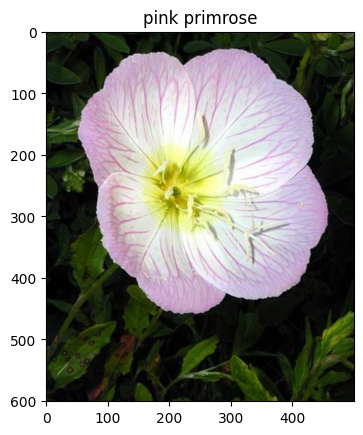

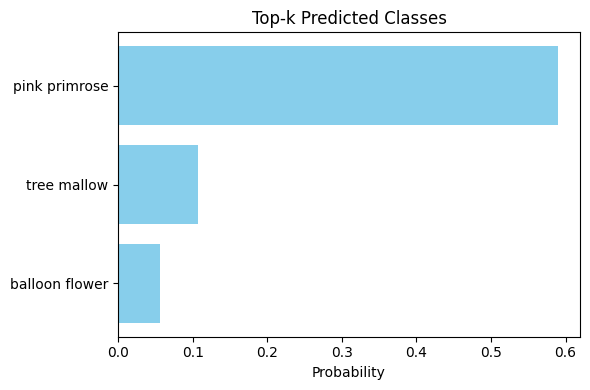

In [5]:
import matplotlib.pyplot as plt

plt.imshow(Image.open(image_path))
plt.title(names[0])

plt.figure(figsize=(6, 4))
plt.barh(range(topk), top_p[0].cpu().numpy(), color='skyblue')
plt.yticks(range(topk), names)
plt.xlabel("Probability")
plt.title("Top-k Predicted Classes")
plt.gca().invert_yaxis()  # Highest probability at top
plt.tight_layout()
plt.show()

The visualizations above demonstrate the final inference results of the trained flower classifier.

 - The top image shows the input flower (pink primrose) used for testing.

 - The bar chart displays the model’s Top-K predictions ranked by confidence.

 - Each bar represents one of the most probable flower categories, and its length corresponds to the predicted probability.

 - The highest-confidence prediction appears at the top, indicating the class the model finds most likely.

This confirms that the inference and visualization steps are functioning correctly, allowing you to interpret prediction confidence visually.

---

### ✅ Summary
You’ve now successfully:
1. Loaded a trained image classification model.
2. Preprocessed an image for inference.
3. Predicted and visualized the top‑K categories.

This completes the demonstration for the **Flower Image Classifier Project**.  
For reproducibility, ensure the same environment and library versions as defined in `requirements.txt`.

---
